# 生成数组的函数

## arange

arange类似于Python中的range函数，只不过返回的不是列表而是数组：

    arange(start, stop=None, step=1 ,dtype=None)
产生一个在区间[start, stop)之间，以step为间隔的数组，如果只输入一个参数，则默认从0开始，并以这个值结束
注意：区间是左开右闭

In [3]:
import numpy as np
np.arange(4)

array([0, 1, 2, 3])

于range不同，arange允许非整数值输入，产生一个非整数的数组

In [4]:
np.arange(0,2*np.pi, np.pi / 4)

array([ 0.        ,  0.78539816,  1.57079633,  2.35619449,  3.14159265,
        3.92699082,  4.71238898,  5.49778714])

数组的类型默认由参数start,stop,step来确定，也可以指定：

In [5]:
np.arange(0,2 * np.pi, np.pi / 4 ,dtype = np.float32)

array([ 0.        ,  0.78539819,  1.57079637,  2.3561945 ,  3.14159274,
        3.92699099,  4.71238899,  5.49778748], dtype=float32)

由于存在精度问题，使用浮点数可能出现问题：

In [6]:
np.arange(1.5,2.1,0.3)

array([ 1.5,  1.8,  2.1])

stop的值2.1出现在了数组中，所以使用浮点数的时候需要注意。

## linspace

    linspace(start, stop, N)
产生N个等距分布在[start, stop]间的元素组成的数组，包括，start,stop

In [10]:
np.linspace(0,1,5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

## logspace

     logspace(start,stop,N)
产生N个对数灯具分布的数组，默认以10为底：

In [11]:
np.logspace(0,1,5)

array([  1.        ,   1.77827941,   3.16227766,   5.62341325,  10.        ])

## meshgrid

有时候需要在二维平面中生成一个网格，这时候可以使用meshgrid来完成：

In [12]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

In [13]:
x, y = np.meshgrid(x_ticks, y_ticks)

In [14]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ]])

In [15]:
y

array([[-1. , -1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

x对应网格的第一维，y对应网格的第二维。
图例：

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5,0,'z')

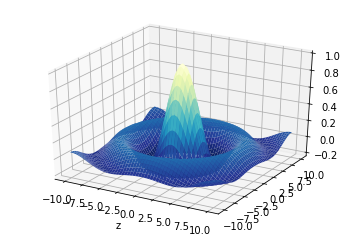

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def f(x,y):
    #sine 函数
    r = np.sqrt(x ** 2 + y ** 2)
    result = np.sin(r) / r
    result[r == 0] = 1.0
    return result
x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)
x, y = np.meshgrid(x_ticks, y_ticks)
z = f(x,y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z ,
               rstride=1, cstride=1,
               cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlabel('z')


事实上，x, y 中有很多冗余的元素，这里提供了一个 sparse 的选项：

In [19]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

In [20]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ]])

In [21]:
y

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ]])

在这个选项下，x, y 变成了单一的行向量和列向量。

但这并不影响结果：

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5,0,'z')

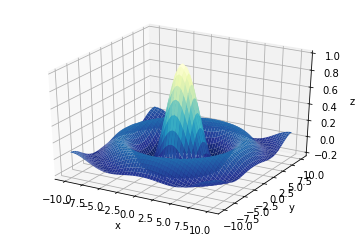

In [22]:
x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

`meshgrid` 可以设置轴排列的先后顺序：
- 默认为 `indexing='xy'` 即笛卡尔坐标，对于2维数组，返回行向量 `x` 和列向量 `y`
- 或者使用 `indexing='ij'` 即矩阵坐标，对于2维数组，返回列向量 `x` 和行向量 `y`。

## ogrid,mgrid

**Matlab**中有 `meshgrid` 的用法：

    meshgrid(-1:.5:1, -1:.5:1)

**Numpy**的 `meshgrid` 并不支持这样的用法，但我们可以使用 `ogrid / mgrid` 来实现类似这样的用法。

`ogrid` 与 `mgrid` 的区别在于：
- `ogrid` 相当于 `meshgrid(indexing='ij', sparse=True)`
- `mgrid` 相当于 `meshgrid(indexing='ij', sparse=False)`

In [26]:
x , y = np.ogrid[-1:1:.5,-1:1:.5]

In [27]:
x

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5]])

In [28]:
y

array([[-1. , -0.5,  0. ,  0.5]])

注意：
- 这里使用的是中括号
- **Matlab** 使用的是 `start:step:end` 的表示，**Numpy** 使用的是 `start:end:step` 的表示
- 这里的结果不包括 `end` 的值

为了包含 `end` 的值，我们可以使用这样的技巧：

In [30]:
x, y = np.ogrid[-1:1:5j, -1:1:5j]

In [31]:
x, y 

(array([[-1. ],
        [-0.5],
        [ 0. ],
        [ 0.5],
        [ 1. ]]), array([[-1. , -0.5,  0. ,  0.5,  1. ]]))

我们在stpe的位置传入一个复数 5j，表示我们需要一个5个值得数组，此时返回值就会包含end的值。
重复之前的画图：

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5,0,'z')

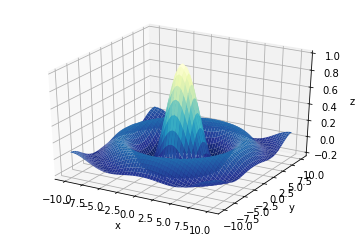

In [32]:
# exchange here
y, x = np.ogrid[-10:10:51j, -10:10:51j]

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## r`_`, c`_`

我们可以使用r`_` /r`_` 来产生行向量或者列向量。
使用切片产生

In [34]:
np.r_[0:1:.1]

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

复数步长制定数组长度：

In [35]:
np.r_[0:1:5j]

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

连接多个序列，产生数组：

In [37]:
np.r_[(3,22,11),4.0,[15,6]]

array([  3.,  22.,  11.,   4.,  15.,   6.])

列向量：

In [39]:
np.c_[1:3:5j]

array([[ 1. ],
       [ 1.5],
       [ 2. ],
       [ 2.5],
       [ 3. ]])

## ones,zeros

```python
ones(shape, dtype=float64)
zeros(shape, dtype=float64)
```
产生一个指定形状的全`0` 或全`1`的数组，还可以指定数组类型：

In [40]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [41]:
np.ones([2,3],dtype=np.float32)

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]], dtype=float32)

产生一个全是5的数组：

In [42]:
np.ones([2,3])*5

array([[ 5.,  5.,  5.],
       [ 5.,  5.,  5.]])

# empty

    empty(shape ,dtype=float64, order='C')
也可以使用`empty`方法产生一个指定大小的数组(数组所指定的内存未被初始化，所以值随机)
再用`fill`方法填充：

In [45]:
a = np.empty(2)
a

array([-0.9591853 , -1.00962364])

In [46]:
a.fill(5)

In [47]:
a

array([ 5.,  5.])

另一种替代方法使用索引，不过速度回稍微慢一点：

In [48]:
a[:] =5

In [49]:
a

array([ 5.,  5.])

## empty_like, ones_like,zeros_like

    empty_like(a)
    ones_like(a)
    zeros_like(a)
产生一个跟a大小一样，类型一样的对应数组

In [52]:
a = np.arange(0,10,2.5)
a

array([ 0. ,  2.5,  5. ,  7.5])

In [53]:
np.empty_like(a)

array([ 0. ,  2.5,  5. ,  7.5])

In [54]:
np.zeros_like(a)

array([ 0.,  0.,  0.,  0.])

In [55]:
np.ones_like(a)

array([ 1.,  1.,  1.,  1.])

# identity

    indentity(n, dtype=float64)
产生一个n * n的单位矩阵：

In [56]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])